# Web Scrapping: Infinite Possibilities 

### Prepared by: Wanjao Colins

In [54]:
#import libraries

from bs4 import BeautifulSoup
import requests
import pandas as pd

In [55]:
#connecting to website

url = 'http://books.toscrape.com/'
html_page = requests.get(url)

In [56]:
# Verifying the successful retrieval of the webpage

html_page.status_code == requests.codes.ok

True

In [57]:
# Creating a BeautifulSoup object to parse the HTML content and make it more readable

soup = BeautifulSoup(html_page.content, 'html.parser')
soup.prettify

<bound method Tag.prettify of <!DOCTYPE html>

<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:29" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="static/oscar/css/styles.css" rel="stylesheet" t

In [58]:
# Extracting book titles by locating 'h3' HTML tags in the parsed webpage content

titles = soup.find_all('h3')
titles

[<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>,
 <h3><a href="catalogue/tipping-the-velvet_999/index.html" title="Tipping the Velvet">Tipping the Velvet</a></h3>,
 <h3><a href="catalogue/soumission_998/index.html" title="Soumission">Soumission</a></h3>,
 <h3><a href="catalogue/sharp-objects_997/index.html" title="Sharp Objects">Sharp Objects</a></h3>,
 <h3><a href="catalogue/sapiens-a-brief-history-of-humankind_996/index.html" title="Sapiens: A Brief History of Humankind">Sapiens: A Brief History ...</a></h3>,
 <h3><a href="catalogue/the-requiem-red_995/index.html" title="The Requiem Red">The Requiem Red</a></h3>,
 <h3><a href="catalogue/the-dirty-little-secrets-of-getting-your-dream-job_994/index.html" title="The Dirty Little Secrets of Getting Your Dream Job">The Dirty Little Secrets ...</a></h3>,
 <h3><a href="catalogue/the-coming-woman-a-novel-based-on-the-life-of-the-infamous-feminist-victoria-woodhull_993/ind

In [59]:
# Extracting the title attribute from the first 'a' tag within the first 'h3' tag,
# providing a more specific detail about the book title.

titles[0].find('a').attrs['title']

'A Light in the Attic'

In [60]:
# Iterating over the list of 'h3' tags to extract book titles using the 'title' attribute from the 'a' tags.

books_list = [title.find('a').attrs['title'] for title in soup.find_all('h3')]
books_list

['A Light in the Attic',
 'Tipping the Velvet',
 'Soumission',
 'Sharp Objects',
 'Sapiens: A Brief History of Humankind',
 'The Requiem Red',
 'The Dirty Little Secrets of Getting Your Dream Job',
 'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
 'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
 'The Black Maria',
 'Starving Hearts (Triangular Trade Trilogy, #1)',
 "Shakespeare's Sonnets",
 'Set Me Free',
 "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
 'Rip it Up and Start Again',
 'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',
 'Olio',
 'Mesaerion: The Best Science Fiction Stories 1800-1849',
 'Libertarianism for Beginners',
 "It's Only the Himalayas"]

In [63]:
# Extracting book ratings by searching for 'p' tags with class containing 'star-rating' and capturing the rating value.
import re

# Define a regular expression to match the 'star-rating' class
regex = re.compile('star-rating(.*)')

# Find all 'p' tags with the specified class and extract the rating values
ratings = [rating.attrs['class'][1] for rating in soup.find_all('p', {"class": regex})]
ratings


['Three',
 'One',
 'One',
 'Four',
 'Five',
 'One',
 'Four',
 'Three',
 'Four',
 'One',
 'Two',
 'Four',
 'Five',
 'Five',
 'Five',
 'Three',
 'One',
 'One',
 'Two',
 'Two']

In [13]:
# Mapping textual star ratings to numerical values using a predefined dictionary.

star_dict = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, "Five": 5}
star_rating = [star_dict[s] for s in ratings]
star_rating

[3, 1, 1, 4, 5, 1, 4, 3, 4, 1, 2, 4, 5, 5, 5, 3, 1, 1, 2, 2]

In [64]:
# Extracting book prices from 'p' tags with the class 'price_color' in the parsed webpage content

soup.find_all('p', class_="price_color")

[<p class="price_color">£51.77</p>,
 <p class="price_color">£53.74</p>,
 <p class="price_color">£50.10</p>,
 <p class="price_color">£47.82</p>,
 <p class="price_color">£54.23</p>,
 <p class="price_color">£22.65</p>,
 <p class="price_color">£33.34</p>,
 <p class="price_color">£17.93</p>,
 <p class="price_color">£22.60</p>,
 <p class="price_color">£52.15</p>,
 <p class="price_color">£13.99</p>,
 <p class="price_color">£20.66</p>,
 <p class="price_color">£17.46</p>,
 <p class="price_color">£52.29</p>,
 <p class="price_color">£35.02</p>,
 <p class="price_color">£57.25</p>,
 <p class="price_color">£23.88</p>,
 <p class="price_color">£37.59</p>,
 <p class="price_color">£51.33</p>,
 <p class="price_color">£45.17</p>]

In [15]:
#using the '.text' attribute to extract textual content within the HTML element

price_list = [price.text for price in soup.find_all('p', class_="price_color")]
price_list

['£51.77',
 '£53.74',
 '£50.10',
 '£47.82',
 '£54.23',
 '£22.65',
 '£33.34',
 '£17.93',
 '£22.60',
 '£52.15',
 '£13.99',
 '£20.66',
 '£17.46',
 '£52.29',
 '£35.02',
 '£57.25',
 '£23.88',
 '£37.59',
 '£51.33',
 '£45.17']

In [67]:
# Extracting book availability text from 'p' tags with the class 'instock availability',
# and using strip() to remove leading and trailing whitespaces for cleaner data.
availablility = [avail.text.strip() for avail in soup.find_all('p', class_="instock availability")]
availablility


['In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock']

## Scrapping Images

In [17]:
# Extracting all image tags ('img') from the parsed webpage content.
images = soup.find_all('img')

# Previewing an example image by selecting the first image in the list.
ex_image = images[0]
ex_image


<img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/>

In [71]:
# Selecting the URL of the image from the 'src' attribute of the example image.
image_url = ex_image.attrs['src']
image_url

'media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg'

### Saving Image Files Locally

In [72]:
import shutil

# Base URL for the book images on the website
url_base = "http://books.toscrape.com/"

# Extracting the image URL from the 'src' attribute of the example image
image_url = ex_image.attrs['src']

# Creating the full URL by combining the base URL and the image URL
full_url = url_base + image_url

# Sending a GET request to the image URL and streaming the content
r = requests.get(full_url, stream=True)

# Saving the image locally with a specified file path
with open('Images/book1cover.jpg', 'wb') as file:
    # Decode the content if needed
    r.raw.decode_content = True
    
    # Copying the raw content to the local file
    shutil.copyfileobj(r.raw, file)


### Previewing an Individual Image File

In [73]:
# Importing necessary libraries for displaying images in Jupyter Notebook
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image, HTML

# Allowing inline rendering of matplotlib plots in Jupyter Notebook
%matplotlib inline


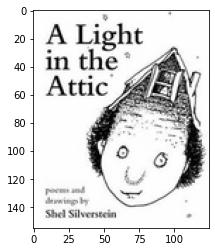

In [21]:
# Reading and displaying the image using matplotlib
img = mpimg.imread('Images/book1cover')

# Creating an image plot using imshow
imgplot = plt.imshow(img)

# Displaying the image plot
plt.show()


In [68]:
# Looping over all the images in the webpage and printing them in a pandas DF

import pandas as pd
data = []
for n, img in enumerate(images):
    url_base = "http://books.toscrape.com/"
    url_ext = img.attrs['src']
    full_url = url_base + url_ext
    r = requests.get(full_url, stream=True)
    path = 'images/book{}.jpg'.format(n+1)
    title = img.attrs['alt']
    if r.status_code == 200:
        with open(path, 'wb') as f:
            r.raw.decode_content = True
            shutil.copyfileobj(r.raw, f)
        row = [title, '<img src="{}">'.format(path)]
        data.append(row)
df = pd.DataFrame(data)
print('Number of rows:', len(df))
df.columns = ['title', 'cover']
HTML(df.to_html(escape=False))

Number of rows: 20


,title,cover
0,A Light in the Attic,
1,Tipping the Velvet,
2,Soumission,
3,Sharp Objects,
4,Sapiens: A Brief History of Humankind,
5,The Requiem Red,
6,The Dirty Little Secrets of Getting Your Dream Job,
7,"The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull",
8,The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics,
9,The Black Maria,


In [69]:
#appending additional columns into the df

df['availablility'] = availablility
df['rating'] = ratings
df['price_list'] = price_list
df

,title,cover,availablility,rating,price_list
0,A Light in the Attic,"<img src=""images/book1.jpg"">",In stock,Three,£51.77
1,Tipping the Velvet,"<img src=""images/book2.jpg"">",In stock,One,£53.74
2,Soumission,"<img src=""images/book3.jpg"">",In stock,One,£50.10
3,Sharp Objects,"<img src=""images/book4.jpg"">",In stock,Four,£47.82
4,Sapiens: A Brief History of Humankind,"<img src=""images/book5.jpg"">",In stock,Five,£54.23
5,The Requiem Red,"<img src=""images/book6.jpg"">",In stock,One,£22.65
6,The Dirty Little Secrets of Getting Your Dream...,"<img src=""images/book7.jpg"">",In stock,Four,£33.34
7,The Coming Woman: A Novel Based on the Life of...,"<img src=""images/book8.jpg"">",In stock,Three,£17.93
8,The Boys in the Boat: Nine Americans and Their...,"<img src=""images/book9.jpg"">",In stock,Four,£22.60
9,The Black Maria,"<img src=""images/book10.jpg"">",In stock,One,£52.15


## Scrapping Data from a Wikipedia Page!

In [23]:
#connecting to wikipedia page

url = "https://en.wikipedia.org/wiki/List_of_cities_and_towns_in_Kenya_by_population"
html_page = requests.get(url)
html_page.status_code

200

In [24]:
# Printing our soup

soup = BeautifulSoup(html_page.text, "html")
soup

#(It does not look pretty at all)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-typography-survey-disabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of cities and towns in Kenya by population - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled v

In [25]:
table = soup.find('table', class_='wikitable sortable')
table

<table class="wikitable sortable">
<tbody><tr>
<th style="color: black; background-color: #ABCDEF">№
</th>
<th style="color: black; background-color: #ABCDEF">City/ Town
</th>
<th style="color: black; background-color: #ABCDEF">Status
</th>
<th style="color: black; background-color: #ABCDEF">Population
</th>
<th style="color: black; background-color: #ABCDEF"><a href="/wiki/Counties_of_Kenya" title="Counties of Kenya">County</a>
</th>
<th style="color: yellow; background-color: #ABCDEF">Ref
</th></tr>
<tr bgcolor="#FFFFE0">
<td>1.</td>
<td align="left"><span typeof="mw:File"><a class="mw-file-description" href="/wiki/File:Coat_of_Arms_of_Nairobi.svg"><img class="mw-file-element" data-file-height="730" data-file-width="724" decoding="async" height="30" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/e7/Coat_of_Arms_of_Nairobi.svg/30px-Coat_of_Arms_of_Nairobi.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/e7/Coat_of_Arms_of_Nairobi.svg/45px-Coat_of_Arms_of_Nairob

In [26]:
table_headers = table.findAll('th')
table_headers

[<th style="color: black; background-color: #ABCDEF">№
 </th>,
 <th style="color: black; background-color: #ABCDEF">City/ Town
 </th>,
 <th style="color: black; background-color: #ABCDEF">Status
 </th>,
 <th style="color: black; background-color: #ABCDEF">Population
 </th>,
 <th style="color: black; background-color: #ABCDEF"><a href="/wiki/Counties_of_Kenya" title="Counties of Kenya">County</a>
 </th>,
 <th style="color: yellow; background-color: #ABCDEF">Ref
 </th>]

In [27]:
#cleaning up a bit...
cleaned_table_headers = [header.text.strip() for header in table_headers]
cleaned_table_headers

['№', 'City/ Town', 'Status', 'Population', 'County', 'Ref']

In [28]:
# We can now structure our DF using the headers obtained above

df = pd.DataFrame(columns= cleaned_table_headers)
df

,№,City/ Town,Status,Population,County,Ref


In [29]:
table_rows = table.find_all('tr')[1:]
table_rows

[<tr bgcolor="#FFFFE0">
 <td>1.</td>
 <td align="left"><span typeof="mw:File"><a class="mw-file-description" href="/wiki/File:Coat_of_Arms_of_Nairobi.svg"><img class="mw-file-element" data-file-height="730" data-file-width="724" decoding="async" height="30" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/e7/Coat_of_Arms_of_Nairobi.svg/30px-Coat_of_Arms_of_Nairobi.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/e7/Coat_of_Arms_of_Nairobi.svg/45px-Coat_of_Arms_of_Nairobi.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/e7/Coat_of_Arms_of_Nairobi.svg/60px-Coat_of_Arms_of_Nairobi.svg.png 2x" width="30"/></a></span> <span style="font-size:110%;"><a href="/wiki/Nairobi" title="Nairobi">Nairobi</a></span></td>
 <td><span style="font-size:100%;">Capital</span></td>
 <td style="background-color:#E0E0E0;"><span data-sort-value="7006439707300000000♠">4,397,073</span></td>
 <td><span typeof="mw:File"><a class="mw-file-description" href="/wiki/File:Coat_of_Arms

In [30]:
for row in table_rows:
    row_data = row.findAll('td')
    individual_row_data = [data.text.strip() for data in table_rows]
individual_row_data

['1.\n Nairobi\nCapital\n4,397,073\n Nairobi\n[2]',
 '2.\n Mombasa\nCity\n1,208,333\n Mombasa\n[3]',
 '3.\nNakuru\nCity\n570,674\nNakuru\n[3]',
 '4.\nRuiru\nMunicipality (Ruiru + Githurai)\n490,120\nKiambu\n[3]',
 '5.\nEldoret\nMunicipality\n475,716\nUasin Gishu\n[3]',
 '6.\nKisumu\nCity\n397,957\nKisumu\n[3]',
 '7.\nKikuyu\nMunicipality\n323,881\nKiambu\n[3]',
 '8.\nNgong\nMunicipality (Ngong + O/Rongai)\n279,757\nKajiado\n[3]',
 '9.\nMavoko\nMunicipality (Mlolongo + Athi River + Syokimau + Katani + Githunguri)\n258,498\nMachakos\n[4]',
 "10.\nThika\nMunicipality\n251,407\nKiambu/Murang'a\n[3]",
 '11.\nNaivasha\nMunicipality\n198,444\nNakuru\n[3]',
 '12.\nKaruri\nMunicipality (Ruaka + Ndenderu) \n194,342\nKiambu\n[3]',
 '13.\nJuja\nMunicipality\n156,041\nKiambu\n[4]',
 '14.\nKitengela\nMunicipality (Kitengela + Kisaju)\n154,643\nKajiado\n[4]',
 '15.\nKiambu\nMunicipality\n155,896\nKiambu\n[4]',
 '16.\nMalindi\nMunicipality\n119,859\nKilifi\n[4]',
 '17.\nMandera\nMunicipality\n114,718\

In [31]:

cleaned_row_data = [entry.split('\n') for entry in individual_row_data]
cleaned_row_data

[['1.', ' Nairobi', 'Capital', '4,397,073', ' Nairobi', '[2]'],
 ['2.', ' Mombasa', 'City', '1,208,333', ' Mombasa', '[3]'],
 ['3.', 'Nakuru', 'City', '570,674', 'Nakuru', '[3]'],
 ['4.',
  'Ruiru',
  'Municipality (Ruiru + Githurai)',
  '490,120',
  'Kiambu',
  '[3]'],
 ['5.', 'Eldoret', 'Municipality', '475,716', 'Uasin Gishu', '[3]'],
 ['6.', 'Kisumu', 'City', '397,957', 'Kisumu', '[3]'],
 ['7.', 'Kikuyu', 'Municipality', '323,881', 'Kiambu', '[3]'],
 ['8.',
  'Ngong',
  'Municipality (Ngong + O/Rongai)',
  '279,757',
  'Kajiado',
  '[3]'],
 ['9.',
  'Mavoko',
  'Municipality (Mlolongo + Athi River + Syokimau + Katani + Githunguri)',
  '258,498',
  'Machakos',
  '[4]'],
 ['10.', 'Thika', 'Municipality', '251,407', "Kiambu/Murang'a", '[3]'],
 ['11.', 'Naivasha', 'Municipality', '198,444', 'Nakuru', '[3]'],
 ['12.',
  'Karuri',
  'Municipality (Ruaka + Ndenderu) ',
  '194,342',
  'Kiambu',
  '[3]'],
 ['13.', 'Juja', 'Municipality', '156,041', 'Kiambu', '[4]'],
 ['14.',
  'Kitengela',


In [32]:
# Initialize variables to store information about the list with the fewest elements
min_length = float('inf')  # Set to positive infinity initially
min_length_list = None

# Iterate over each list in the list of lists
for current_list in cleaned_row_data:
    current_length = len(current_list)

    # Update variables if the current list has fewer elements
    if current_length < min_length:
        min_length = current_length
        min_length_list = current_list

# Display the result
print(f"The list with the fewest elements is: {min_length_list}")

The list with the fewest elements is: ['65.', 'Watamu', 'Town Council', '27,857', 'Kilifi']


In [33]:
#removing the problematic row, it appears to be missings data in the last column.
cleaned_row_data.remove(['65.', 'Watamu', 'Town Council', '27,857', 'Kilifi'])

In [34]:
cleaned_row_data

[['1.', ' Nairobi', 'Capital', '4,397,073', ' Nairobi', '[2]'],
 ['2.', ' Mombasa', 'City', '1,208,333', ' Mombasa', '[3]'],
 ['3.', 'Nakuru', 'City', '570,674', 'Nakuru', '[3]'],
 ['4.',
  'Ruiru',
  'Municipality (Ruiru + Githurai)',
  '490,120',
  'Kiambu',
  '[3]'],
 ['5.', 'Eldoret', 'Municipality', '475,716', 'Uasin Gishu', '[3]'],
 ['6.', 'Kisumu', 'City', '397,957', 'Kisumu', '[3]'],
 ['7.', 'Kikuyu', 'Municipality', '323,881', 'Kiambu', '[3]'],
 ['8.',
  'Ngong',
  'Municipality (Ngong + O/Rongai)',
  '279,757',
  'Kajiado',
  '[3]'],
 ['9.',
  'Mavoko',
  'Municipality (Mlolongo + Athi River + Syokimau + Katani + Githunguri)',
  '258,498',
  'Machakos',
  '[4]'],
 ['10.', 'Thika', 'Municipality', '251,407', "Kiambu/Murang'a", '[3]'],
 ['11.', 'Naivasha', 'Municipality', '198,444', 'Nakuru', '[3]'],
 ['12.',
  'Karuri',
  'Municipality (Ruaka + Ndenderu) ',
  '194,342',
  'Kiambu',
  '[3]'],
 ['13.', 'Juja', 'Municipality', '156,041', 'Kiambu', '[4]'],
 ['14.',
  'Kitengela',


In [35]:
for row in cleaned_row_data:
    length = len(df)
    df.loc[length] = row 
df

,№,City/ Town,Status,Population,County,Ref
0,1.,Nairobi,Capital,"4,397,073",Nairobi,[2]
1,2.,Mombasa,City,"1,208,333",Mombasa,[3]
2,3.,Nakuru,City,"570,674",Nakuru,[3]
3,4.,Ruiru,Municipality (Ruiru + Githurai),"490,120",Kiambu,[3]
4,5.,Eldoret,Municipality,"475,716",Uasin Gishu,[3]
...,...,...,...,...,...,...
94,96.,Banissa,Other Centre,"14,974",Mandera,[4]
95,97.,Msambweni,Other Centre,"14,951",Kwale,[4]
96,98.,Namanga,Other Centre,"14,922",Kajiado,[4]
97,99.,Mbita,Municipality,"14,916",Homa Bay,[4]


In [36]:
# Printing our Final DF
df = df.set_index(cleaned_table_headers[0])


In [37]:
df

,City/ Town,Status,Population,County,Ref
№,,,,,
1.,Nairobi,Capital,"4,397,073",Nairobi,[2]
2.,Mombasa,City,"1,208,333",Mombasa,[3]
3.,Nakuru,City,"570,674",Nakuru,[3]
4.,Ruiru,Municipality (Ruiru + Githurai),"490,120",Kiambu,[3]
5.,Eldoret,Municipality,"475,716",Uasin Gishu,[3]
...,...,...,...,...,...
96.,Banissa,Other Centre,"14,974",Mandera,[4]
97.,Msambweni,Other Centre,"14,951",Kwale,[4]
98.,Namanga,Other Centre,"14,922",Kajiado,[4]


In [46]:
#adding another column for timestamp
import datetime

df["date"] = datetime.date.today()

In [47]:
df

,City/ Town,Status,Population,County,Ref,date
№,,,,,,
1.,Nairobi,Capital,"4,397,073",Nairobi,[2],2023-11-26
2.,Mombasa,City,"1,208,333",Mombasa,[3],2023-11-26
3.,Nakuru,City,"570,674",Nakuru,[3],2023-11-26
4.,Ruiru,Municipality (Ruiru + Githurai),"490,120",Kiambu,[3],2023-11-26
5.,Eldoret,Municipality,"475,716",Uasin Gishu,[3],2023-11-26
...,...,...,...,...,...,...
96.,Banissa,Other Centre,"14,974",Mandera,[4],2023-11-26
97.,Msambweni,Other Centre,"14,951",Kwale,[4],2023-11-26
98.,Namanga,Other Centre,"14,922",Kajiado,[4],2023-11-26


In [39]:
#exporting data into a csv file

df.to_csv('pop.census.csv')